# Milestone 1 Assignment - Capstone Proposal

## Author - Yulia Zubova

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem</li>
<li>Evaluate and explore the available data</li>
<li>Proper data preparation</li>
<li>Exploration of data and understand relationships</li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data. For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience.</li>




## Tasks
For this proposal, you are to:
1. Generate or describe a solvable business problem and outline the flow of data needed to address the problem.
2. Identify 2 or more available data sets
3. Report on the statistics of each data set to include: type, unique values, missing values, quantile statistics, descriptive statistics, most frequent values, and histogram. Include analysis statements based on results.
4. Perform data preparation based on analysis of the quality of the available data include concatenation method, imputation method(s), dealing with outliers, and binning/scaling transformation.
5. Output the resulting data into a new data file
6. Identify potential machine learning model(s)


## Problem Definition



In this Capstone project we are going to see if unemployment rate, average income, poverty level and other social-economics parameters affect the results of federal elections by state. And if they affect, we need to understand how exactly it happens.

Then using classification machine learning techniques we will try to predict who will win  (Republicans or Democrats) the upcoming president elections in each state.

To solve this problem it's necessary to get following data:
* Elections results by state/year;
* Employment/unemployment data by state/year;
* Data about poverty level by state/year;
* Average income by state/year;
* etc.

All datasets should have "State" and "Year". Only in this case we'll be able to join datasets. 

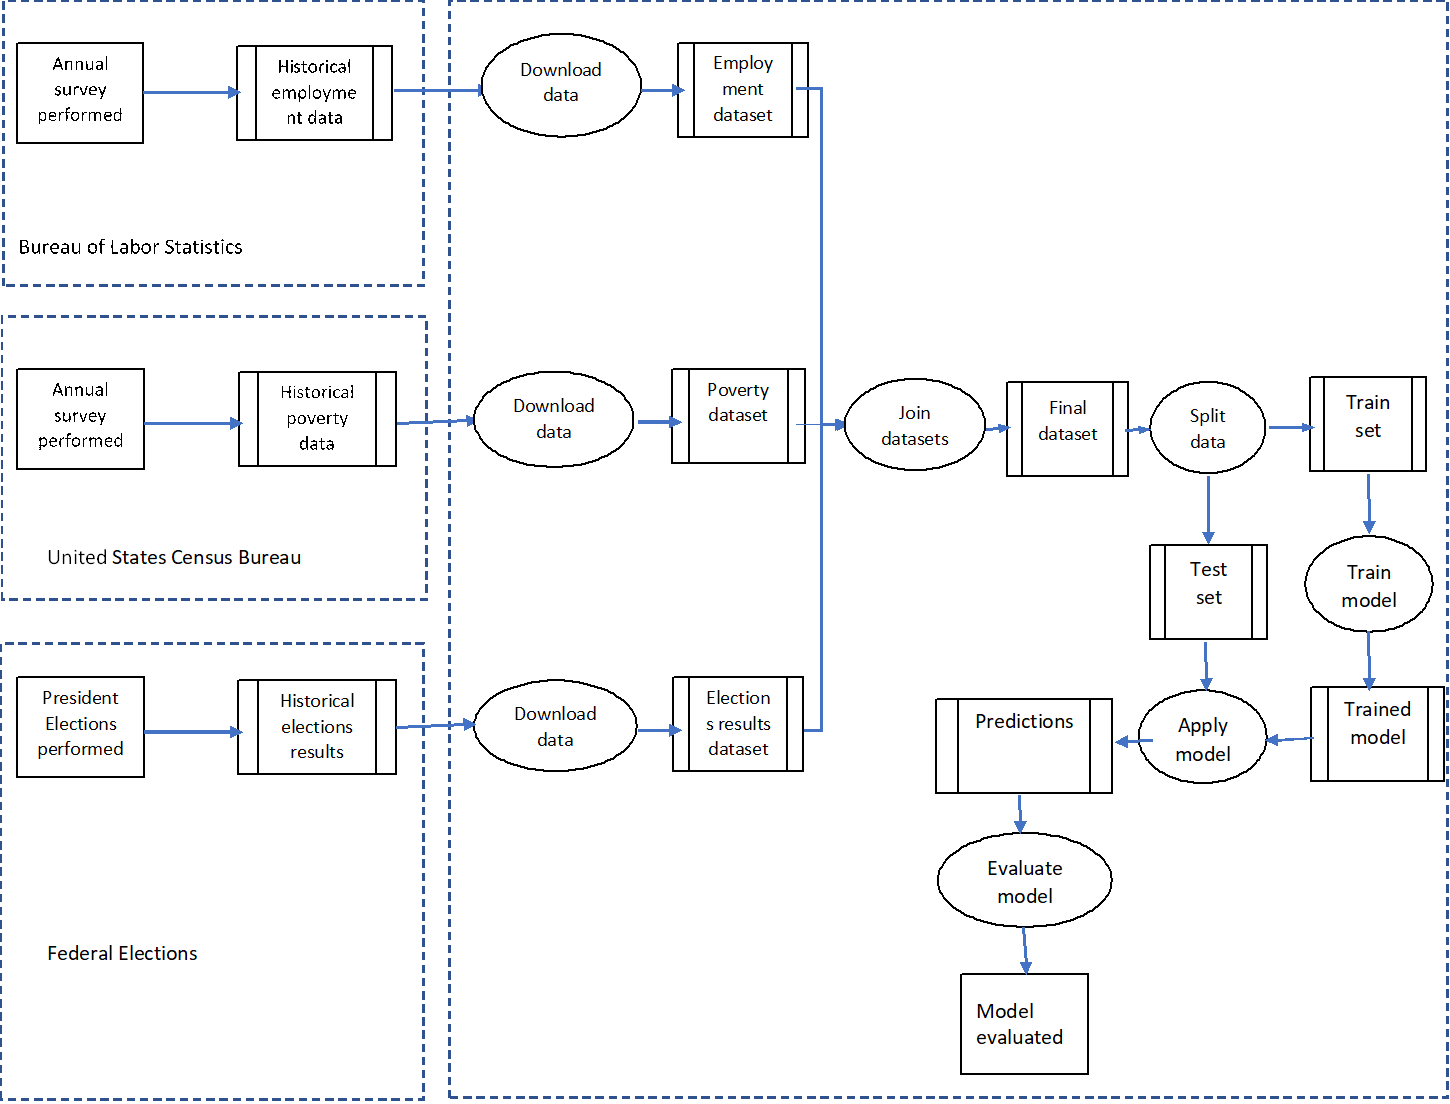

For sure, the main dataset for our team is historical elections results data. But in terms of spreading work, we are responsible for preparation and cleaning different types of data for each team member. I was preparing socioeconomic data (unemployment data and poverty data).

## Data Sets

### 1. Employment / unemployment data ###
#### Dataset sourse: https://data.bls.gov/PDQWeb/la

It's a WEB-tool that allows to get data from Bureau of Labor Statistics about employment/unemployment data by year, area (state, county, city, etc.).

I retrieved data by state for all available years (since 1976). Because data are available in XLS-files, separate file for each state, I had to combine all these data in one CSV-file, presented below. 

Also I've left annual data only, because data are available by month too.
Dataset contains columns "State" and "Year" that will be used as keys for joinoing with other datasets.

### 2. Poverty and income estimates data ###
#### Dataset source: https://www.census.gov/data-tools/demo/saipe/saipe.html?s_appName=saipe&menu=grid_proxy&s_USStOnly=y&map_yearSelector=2016&map_geoSelector=aa_c&s_measures=aa_snc

It's a WEB-tool from United States Census Bureau that provides poverty rate data by year, area (state and county) and age.
I've downloaded data by state, for all age categories and for all available years (since 1989).
Dataset is available in CSV and PDF formats.

Dataset contains columns "State" and "Year" that will be used as keys for joinoing with other datasets.

## Profile Reports & Analysis Statements

In [288]:
# Import libraries
import pandas as pd
import numpy as np
import pandas_profiling
from matplotlib import pyplot

### 1. Employment / unemployment data

Presented dataset was combined from separate XLS-tables.

In [289]:
#Download dataset with unemployment data
unemployment_df = pd.read_csv("unemployment_data.csv")

In [290]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 7 columns):
State                2184 non-null object
Year                 2184 non-null int64
Period               2184 non-null object
labor force          2184 non-null int64
employment           2184 non-null int64
unemployment         2184 non-null int64
unemployment rate    2184 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 119.5+ KB


Dataset contains 2184 rows and 7 columns.
Columns: 
* State;
* Year;
* labor force - total amount of people, able to work in current state in current year (unemployment+employment);
* employment - total amount of employment people in current state in current year;
* unemployment - total amount of unemployment people in current state in current year;
* unemployment rate - unemployment/labor force;


In [291]:
#Descriptive dataset statistics 
unemployment_df.describe()

,Year,labor force,employment,unemployment,unemployment rate
count,2184.000000,2.184000e+03,2.184000e+03,2.184000e+03,2184.000000
mean,1996.500000,2.594640e+06,2.429436e+06,1.652043e+05,6.194277
std,12.123694,2.884733e+06,2.690980e+06,2.101469e+05,2.443983
min,1976.000000,1.635700e+05,1.511900e+05,6.091000e+03,2.300000
25%,1986.000000,6.978418e+05,6.583405e+05,3.714900e+04,4.600000
50%,1996.500000,1.716111e+06,1.626573e+06,1.048280e+05,5.700000
75%,2007.000000,3.125575e+06,2.941397e+06,1.903140e+05,7.300000
max,2017.000000,1.931196e+07,1.839308e+07,2.244326e+06,23.400000


In [269]:
pandas_profiling.ProfileReport(unemployment_df)

Number of variables,7
Number of observations,2184
Total Missing (%),0.0%
Total size in memory,119.5 KiB
Average record size in memory,56.0 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


Dataset doesn't contain missing data.
And because dataset contains consolidated data by state and year, there are no outliers here.

* According correlation matrix, column "Period" contains constant data, so it could be deleted.
* Variable "employment" is highly correlated with "labor force", "unemployment" - with "unemployment rate". 
 We could delete columns "employment" and "unemployment".
* All variables except 'State' and 'Period' have numerical type.

### 2. Poverty data

In [292]:
#Download dataset
poverty_df = pd.read_csv("poverty_data.csv")

Dataset contains of 1224 rows and 44 columns.

Columns:
* Year                                                                    
* State                                                                   
* County ID                                                                
* State / County Name                                                     
* All Ages SAIPE Poverty Universe - all amount of people included to survey results                                          
* All Ages in Poverty Count  - amount of people all ages in poverty                                             
* All Ages in Poverty Count LB 90% - amount of people all ages in poverty (lower bound)                                         
* All Ages in Poverty Count UB 90% - amount of people all ages in poverty (upper bound)                                          * 90% Confidence Interval (All Ages in Poverty Count)                     
* All Ages in Poverty Percent                                              
* All Ages in Poverty Percent LB 90%                                      
* All Ages in Poverty Percent UB 90%                                       
* 90% Confidence Interval (All Ages in Poverty Percent)                 
*  Under Age 18 SAIPE Poverty Universe                                      
* Under Age 18 in Poverty Count                                           
* Under Age 18 in Poverty Count LB 90%                                    
* Under Age 18 in Poverty Count UB 90%                                   
* 90% Confidence Interval (Under Age 18 in Poverty Count)                  
* Under Age 18 in Poverty Percent                                          
* Under Age 18 in Poverty Percent LB 90%                                   
* Under Age 18 in Poverty Percent UB 90%                                   
* 90% Confidence Interval (Under Age 18 in Poverty Percent)               
* Ages 5 to 17 in Families SAIPE Poverty Universe                          
* Ages 5 to 17 in Families in Poverty Count                                
* Ages 5 to 17 in Families in Poverty Count LB 90%                         
* Ages 5 to 17 in Families in Poverty Count UB 90%                         
* 90% Confidence Interval (Ages 5 to 17 in Families in Poverty Count)      
* Ages 5 to 17 in Families in Poverty Percent                              
* Ages 5 to 17 in Families in Poverty Percent LB 90%                      
* Ages 5 to 17 in Families in Poverty Percent UB 90%                       
* 90% Confidence Interval (Ages 5 to 17 in Families in Poverty Percent)    
* Under Age 5 SAIPE Poverty Universe                                      
* Under Age 5 in Poverty Count                                            
* Under Age 5 in Poverty Count LB 90%                                      
* Under Age 5 in Poverty Count UB 90%                                     
* 90% Confidence Interval (Under Age 5 in Poverty Count)                   
* Under Age 5 in Poverty Percent                                           
* Under Age 5 in Poverty Percent LB 90%                                    
* Under Age 5 in Poverty Percent UB 90%                                    
* 90% Confidence Interval (Under Age 5 in Poverty Percent)                 
* Median Household Income in Dollars                                      
* Median Household Income in Dollars LB 90%                                
* Median Household Income in Dollars UB 90%                                
* 90% Confidence Interval (Median Household Income in Dollars)             

In [293]:
#Descriptive dataset statistics
poverty_df.describe()

,Year,State,County ID,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,All Ages in Poverty Percent,All Ages in Poverty Percent LB 90%,All Ages in Poverty Percent UB 90%,...,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Count LB 90%,Under Age 5 in Poverty Count UB 90%,Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%
count,1224.000000,1224.000000,1224.000000,9.690000e+02,1.224000e+03,1.224000e+03,1.224000e+03,1224.000000,1224.000000,1224.000000,...,9.690000e+02,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,2004.291667,28.960784,28960.784314,5.777311e+06,7.732296e+05,7.459392e+05,8.005199e+05,13.216422,12.633497,13.799510,...,3.871899e+05,85623.137255,77830.267974,93416.022876,21.366912,19.019281,23.716340,44871.263072,43740.269608,46002.198529
std,7.302979,15.683243,15683.243258,6.492953e+06,9.596990e+05,9.378868e+05,9.821087e+05,3.404929,3.421005,3.412983,...,4.548786e+05,111051.610550,103841.349199,118666.356303,5.969650,6.079159,6.071503,10745.768568,10926.955236,10588.931535
min,1989.000000,1.000000,1000.000000,4.774280e+05,4.814900e+04,4.543600e+04,5.086300e+04,5.600000,5.000000,6.300000,...,2.912500e+04,4350.000000,2420.000000,5164.000000,6.800000,3.100000,9.500000,19874.000000,18731.000000,21017.000000
25%,1998.750000,16.000000,16000.000000,1.565489e+06,1.699700e+05,1.582488e+05,1.812428e+05,10.600000,9.900000,11.200000,...,1.009220e+05,20355.750000,16708.500000,23456.000000,16.800000,14.375000,19.175000,37277.500000,35988.500000,38648.750000
50%,2004.500000,29.000000,29000.000000,4.042184e+06,5.263175e+05,4.945345e+05,5.514165e+05,12.600000,12.100000,13.200000,...,2.669480e+05,56252.500000,49330.500000,62586.000000,20.700000,18.400000,22.900000,44027.000000,42840.500000,45020.500000
75%,2010.250000,42.000000,42000.000000,6.489044e+06,8.832192e+05,8.626242e+05,9.035792e+05,15.800000,15.200000,16.200000,...,4.325920e+05,94541.000000,87307.250000,102666.750000,25.800000,23.500000,27.900000,51268.500000,50506.000000,52081.500000
max,2016.000000,56.000000,56000.000000,3.851333e+07,6.328064e+06,6.276939e+06,6.379189e+06,24.600000,23.400000,26.000000,...,2.694275e+06,849157.000000,729342.000000,968972.000000,40.700000,38.600000,43.400000,78787.000000,78070.000000,79504.000000


In [274]:
#Generate dataset report
pandas_profiling.ProfileReport(poverty_df)

Number of variables,44
Number of observations,1224
Total Missing (%),0.5%
Total size in memory,420.8 KiB
Average record size in memory,352.1 B
Numeric,5
Categorical,5
Boolean,0
Date,0
Text (Unique),5
Rejected,29


* According correlation matrix many colums are highly correlated and could be deleted from dataset. Also I'm going to delete variables with non-numerical type that contains information about confidence intervals for variables.
* Variables 'All Ages in Poverty Percent' and 'Median Household Income in Dollars' likely are distrubuted normally.

## Data Preparation



### 1. Unemployment data ###

Dataset doesn't contain missing data. And because dataset contains consolidated data by state and year, there are no outliers here.

According correlation matrix, column "Period" contains constant data, so it could be deleted. Variable "employment" is highly correlated with "labor force", "unemployment" - with "unemployment rate". We could delete columns "employment" and "unemployment".

In [294]:
#Delete columns
unemployment_df = unemployment_df.drop(['Period', 'employment', 'unemployment'], axis = 1)

In [296]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 4 columns):
State                2184 non-null object
Year                 2184 non-null int64
labor force          2184 non-null int64
unemployment rate    2184 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 68.3+ KB


### 2. Poverty data ###

According correlation matrix many colums are highly correlated and could be deleted from dataset.

In [298]:
#Delete highly correlated variables
poverty_df = poverty_df.drop(['All Ages in Poverty Count LB 90%', 'All Ages in Poverty Count UB 90%', '90% Confidence Interval (All Ages in Poverty Count)',
                 'All Ages in Poverty Percent LB 90%', 'All Ages in Poverty Percent UB 90%', '90% Confidence Interval (All Ages in Poverty Percent)',
                  'Under Age 18 in Poverty Count LB 90%', 'Under Age 18 in Poverty Count UB 90%', '90% Confidence Interval (Under Age 18 in Poverty Count)',
                  'Under Age 18 in Poverty Percent LB 90%', 'Under Age 18 in Poverty Percent UB 90%', '90% Confidence Interval (Under Age 18 in Poverty Percent)',
                  'Ages 5 to 17 in Families in Poverty Count LB 90%', 'Ages 5 to 17 in Families in Poverty Count UB 90%', '90% Confidence Interval (Ages 5 to 17 in Families in Poverty Count)',
                  'Ages 5 to 17 in Families in Poverty Percent LB 90%', 'Ages 5 to 17 in Families in Poverty Percent UB 90%', '90% Confidence Interval (Ages 5 to 17 in Families in Poverty Percent)',
                  'Under Age 5 in Poverty Count LB 90%', 'Under Age 5 in Poverty Count UB 90%', '90% Confidence Interval (Under Age 5 in Poverty Count)',
                  'Under Age 5 in Poverty Percent LB 90%', 'Under Age 5 in Poverty Percent UB 90%', '90% Confidence Interval (Under Age 5 in Poverty Percent)',
                  'Median Household Income in Dollars LB 90%', 'Median Household Income in Dollars UB 90%', '90% Confidence Interval (Median Household Income in Dollars)'], axis = 1)

In [300]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 17 columns):
Year                                               1224 non-null int64
State                                              1224 non-null int64
County ID                                          1224 non-null int64
State / County Name                                1224 non-null object
All Ages SAIPE Poverty Universe                    969 non-null float64
All Ages in Poverty Count                          1224 non-null int64
All Ages in Poverty Percent                        1224 non-null float64
Under Age 18 SAIPE Poverty Universe                969 non-null float64
Under Age 18 in Poverty Count                      1224 non-null int64
Under Age 18 in Poverty Percent                    1224 non-null float64
Ages 5 to 17 in Families SAIPE Poverty Universe    969 non-null float64
Ages 5 to 17 in Families in Poverty Count          1224 non-null int64
Ages 5 to 17 in Families in Pover

In [301]:
#Delete column "County ID"
poverty_df = poverty_df.drop(['County ID'], axis = 1)

In [302]:
poverty_df = poverty_df.drop(['State'], axis = 1)

In [303]:
#Rename column
poverty_df = poverty_df.rename({'State / County Name':'State'}, axis='columns')

In [304]:
#Check amount null values
print(poverty_df.isnull().sum())

Year                                                 0
State                                                0
All Ages SAIPE Poverty Universe                    255
All Ages in Poverty Count                            0
All Ages in Poverty Percent                          0
Under Age 18 SAIPE Poverty Universe                255
Under Age 18 in Poverty Count                        0
Under Age 18 in Poverty Percent                      0
Ages 5 to 17 in Families SAIPE Poverty Universe    255
Ages 5 to 17 in Families in Poverty Count            0
Ages 5 to 17 in Families in Poverty Percent          0
Under Age 5 SAIPE Poverty Universe                 255
Under Age 5 in Poverty Count                         0
Under Age 5 in Poverty Percent                       0
Median Household Income in Dollars                   0
dtype: int64


In [251]:
#Fill out missing data using function interpolate()
#poverty_df = poverty_df.interpolate()

In [179]:
poverty_df.head(100)

,Year,State,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 SAIPE Poverty Universe,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Ages 5 to 17 in Families SAIPE Poverty Universe,Ages 5 to 17 in Families in Poverty Count,Ages 5 to 17 in Families in Poverty Percent,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Percent,Median Household Income in Dollars
0,2016,Alabama,4.741355e+06,814197,17.2,1.081979e+06,267674,24.7,7.914710e+05,185889,23.5,2.871770e+05,78675,27.4,46309
1,2015,Alabama,4.736374e+06,875853,18.5,1.087692e+06,288450,26.5,7.972160e+05,201222,25.2,2.871640e+05,84382,29.4,44833
2,2014,Alabama,4.727546e+06,905682,19.2,1.091420e+06,298682,27.4,7.999160e+05,207154,25.9,2.881830e+05,88203,30.6,42917
3,2013,Alabama,4.716072e+06,889091,18.9,1.096240e+06,300649,27.4,8.010580e+05,205023,25.6,2.913620e+05,92126,31.6,42882
4,2012,Alabama,4.706967e+06,896515,19.0,1.111278e+06,306451,27.6,8.085620e+05,208811,25.8,2.994130e+05,94623,31.6,41610
5,2011,Alabama,4.687327e+06,896117,19.1,1.114604e+06,307310,27.6,8.120290e+05,209724,25.8,2.989620e+05,94184,31.5,41427
6,2010,Alabama,4.667040e+06,883078,18.9,1.115210e+06,305292,27.4,8.117130e+05,207778,25.6,2.996550e+05,93895,31.3,40538
7,2009,Alabama,4.588886e+06,805223,17.5,1.115169e+06,274243,24.6,8.008840e+05,181942,22.7,3.110580e+05,89398,28.7,40547
8,2008,Alabama,4.541753e+06,721875,15.9,1.105914e+06,244661,22.1,7.947500e+05,157565,19.8,3.050310e+05,82291,27.0,42586
9,2007,Alabama,4.506569e+06,750197,16.6,1.105467e+06,261151,23.6,7.979450e+05,174665,21.9,3.025110e+05,81858,27.1,40596


## Code Output

According formulated problem, the main data that we are going with are elections data, so socioeconomic data are supportive data.
Unemployment and poverty/income data should be joined by key ['State', 'Year'], 

Join type - outer, using this type we well collect all data from each dataset (even in case if we have unemployment data for current year/state, but don't have poverty data for this year/state, and vice versa.)

In [327]:
#Join election data and unemployment data
result_df = pd.merge(unemployment_df,poverty_df, how='outer', on=['State', 'Year'])
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2183
Data columns (total 17 columns):
State                                              2184 non-null object
Year                                               2184 non-null int64
labor force                                        2184 non-null int64
unemployment rate                                  2184 non-null float64
All Ages SAIPE Poverty Universe                    969 non-null float64
All Ages in Poverty Count                          1224 non-null float64
All Ages in Poverty Percent                        1224 non-null float64
Under Age 18 SAIPE Poverty Universe                969 non-null float64
Under Age 18 in Poverty Count                      1224 non-null float64
Under Age 18 in Poverty Percent                    1224 non-null float64
Ages 5 to 17 in Families SAIPE Poverty Universe    969 non-null float64
Ages 5 to 17 in Families in Poverty Count          1224 non-null float64
Ages 5 to 17 in Families 

Final dataset consists of 2184 rows and 17 columns. 

In [306]:
pandas_profiling.ProfileReport(result_df)

Number of variables,17
Number of observations,2184
Total Missing (%),5.2%
Total size in memory,307.1 KiB
Average record size in memory,144.0 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


Filling out missing data with median values by state.

In [332]:
#Variables where we have missing data
variables = ['All Ages SAIPE Poverty Universe', 'All Ages in Poverty Count', 'All Ages in Poverty Percent', 'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Percent', 'Under Age 18 in Poverty Count', 'Ages 5 to 17 in Families SAIPE Poverty Universe', 'Ages 5 to 17 in Families SAIPE Poverty Universe', 'Ages 5 to 17 in Families in Poverty Count', 'Ages 5 to 17 in Families in Poverty Percent', 'Under Age 5 SAIPE Poverty Universe', 'Under Age 5 in Poverty Count', 'Under Age 5 in Poverty Percent', 'Median Household Income in Dollars']

#Fill missing data with median values by state
for variable in variables:
    result_df[variable] = result_df.groupby('State', as_index = False).transform(lambda x: x.fillna(x.median()))[variable]

In [333]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2183
Data columns (total 17 columns):
State                                              2184 non-null object
Year                                               2184 non-null int64
labor force                                        2184 non-null int64
unemployment rate                                  2184 non-null float64
All Ages SAIPE Poverty Universe                    2142 non-null float64
All Ages in Poverty Count                          2142 non-null float64
All Ages in Poverty Percent                        2142 non-null float64
Under Age 18 SAIPE Poverty Universe                2142 non-null float64
Under Age 18 in Poverty Count                      2142 non-null float64
Under Age 18 in Poverty Percent                    2142 non-null float64
Ages 5 to 17 in Families SAIPE Poverty Universe    2142 non-null float64
Ages 5 to 17 in Families in Poverty Count          2142 non-null float64
Ages 5 to 17 in Famili

We still have missing data. It's because we don't have poverty data for Puerto Rico.
I'll left all rows in dataset for now.

In [337]:
result_df[result_df['All Ages SAIPE Poverty Universe'].isnull()]

,State,Year,labor force,unemployment rate,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 SAIPE Poverty Universe,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Ages 5 to 17 in Families SAIPE Poverty Universe,Ages 5 to 17 in Families in Poverty Count,Ages 5 to 17 in Families in Poverty Percent,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Percent,Median Household Income in Dollars
2142,Puerto Rico,1976,858567,19.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2143,Puerto Rico,1977,874025,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2144,Puerto Rico,1978,890758,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,Puerto Rico,1979,897425,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,Puerto Rico,1980,916266,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,Puerto Rico,1981,926291,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2148,Puerto Rico,1982,918100,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149,Puerto Rico,1983,953292,23.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2150,Puerto Rico,1984,975192,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2151,Puerto Rico,1985,992272,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
#Export data to final CSV
result_df.to_csv("final_dataset.csv")

## Machine Learning Model(s)

If we need to predict representative from which party will win (Republican or Democrat), it's a binary classification task.
So classification algorithm should be chosen.

It could be:
* Random Forrest (usually it shows better performance then Decision Tree Classifier);
* K-Nearest Neighbors - there are only 3 classes and dataset isn't huge, so it could work well;
* Support Vector Machines;
* Naive Bayes;
* Logistic regression.


## SUMMARY ##

The main part of this Milestone - research and preparation data. 
I concentrated on social-economic data.
Because our datasets are small, data are consolidated by state and year, we didn't need to handle with outliers.

All datasets prepared by each member of the team will be joined by state and year, and used for work on Milestone 2.